Given two data sets, calculate the completeness and purity of merian given cosmos as truth 

In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from astropy.io import fits

import random

In [2]:
f = '/Users/josephwick/Documents/Data/merian/Merian_cosmos_photoz_eazy.fits'
wtsf = '../speczWeights/specz-weights.npy'

Yifei says use `z_cosmos` as truth and `z_merian` as our photo-z

other important keys are:
* `logmass_cosmos`   (truth)
* `logmass_merian`   (ours)

In [3]:
# Merian mass/z cutoffs:
z_low  = 0.058
z_high = 0.10

m_low  = 8
m_high = 9

In [4]:
data = fits.open(f)[1].data

In [5]:
# make mass cuts
data_m = data[data['logmass_cosmos'] >= m_low]
data_m = data_m[data_m['logmass_cosmos'] <= m_high]

In [6]:
galaxyBins = [[] for x in range(10)]

for g in data_m:
    b = int(10*(g['logmass_cosmos']-8.001))
    
    galaxyBins[b].append(g)

for each galaxy, there's four cases:
1. cosmos & merian say it doesn't belong - ignore
2. cosmos and merian say it belongs - good
3. cosmos says it belongs, merian says no - means incomplete
4. cosmos says no, merian says yes - means impure 

In [7]:
def isWithinZ(z, zLow, zHigh):
    if zLow <= z <= zHigh:
        return True
    return False

In [8]:
m = []
for g in galaxyBins[1]:
    m.append(g['logmass_cosmos'])

In [9]:
comps = []
purs  = []

for galaxies in galaxyBins:
    cosmosInMerian = 0
    merianInMerian = 0
    impurities = 0
    
    for g in galaxies:
        if isWithinZ(g['z_cosmos'], z_low, z_high):
            cosmosInMerian += 1
            if isWithinZ(g['z_merian'], z_low, z_high):
                merianInMerian += 1
        else:
            if isWithinZ(g['z_merian'], z_low, z_high):
                impurities += 1
                
    comps.append(merianInMerian / cosmosInMerian)
    purs.append(1 - (impurities / (cosmosInMerian+impurities)))

In [10]:
np.linspace(8.0,8.9,10)

array([8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9])

Text(0, 0.5, 'completeness')

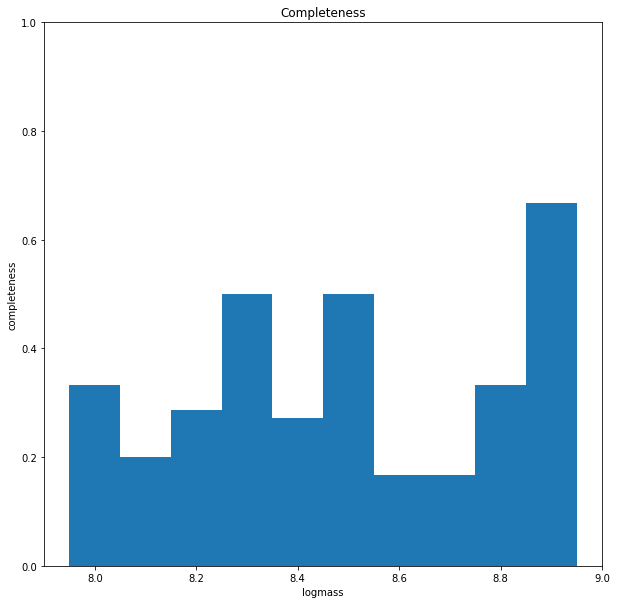

In [11]:
fig = plt.figure(figsize=(10,10))

plt.bar(np.linspace(8,8.9,10), comps, width=0.1)

plt.ylim(0,1.0)

plt.title('Completeness')
plt.xlabel('logmass')
plt.ylabel('completeness')

Text(0, 0.5, 'Purity')

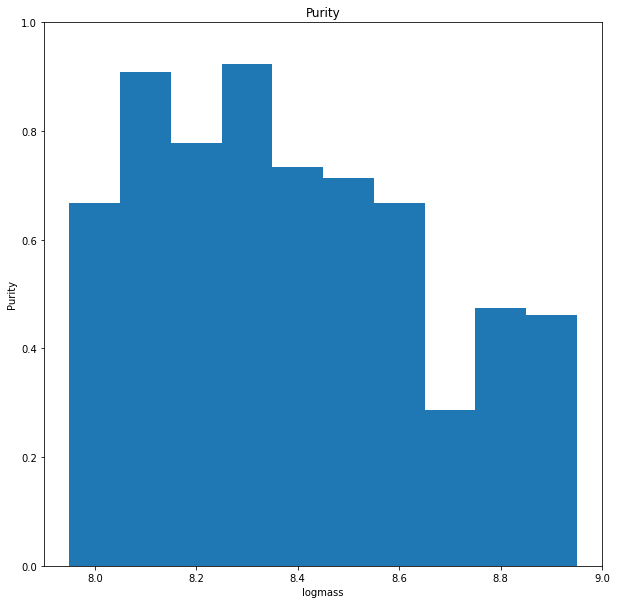

In [12]:
fig = plt.figure(figsize=(10,10))

plt.bar(np.linspace(8,8.9,10), purs, width=0.1)

plt.ylim(0,1.0)

plt.title('Purity')
plt.xlabel('logmass')
plt.ylabel('Purity')

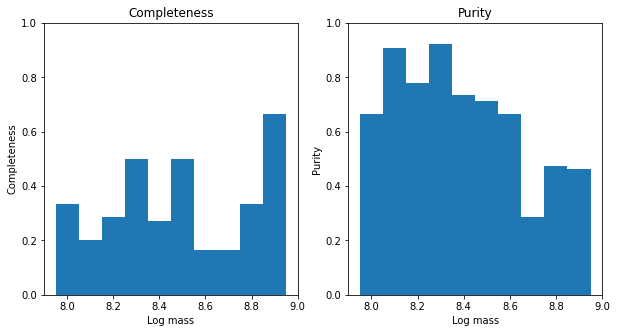

In [25]:
fig, axs = plt.subplots(1,2,figsize=(10,5))

axs[0].bar(np.linspace(8,8.9,10), comps, width=0.1)
axs[1].bar(np.linspace(8,8.9,10), purs, width=0.1)

# Prettify 
axs[0].title.set_text('Completeness')
axs[1].title.set_text('Purity')

axs[0].set_xlabel('Log mass')
axs[0].set_ylabel('Completeness')

axs[1].set_xlabel('Log mass')
axs[1].set_ylabel('Purity')

axs[0].set_ylim([0,1])
axs[1].set_ylim([0,1])

plt.savefig('../figures/CP_prelim.pdf')